#Try using library darts unit8
#Try using optuna for hyperparamter tuning

In [1]:
## Importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime 

In [2]:
## importing the datasets required 

train = pd.read_csv("train.csv")
store = pd.read_csv("store.csv")
test = pd.read_csv("test.csv")

c:\users\prati\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
## Shape of our datasets 

print("In the training dataset we have", train.shape[0], "observations and",train.shape[1],"columns")
print("In the store dataset we have", store.shape[0], "observations and",store.shape[1],"columns")
print("In the testing dataset we have", test.shape[0], "observations and",test.shape[1],"columns")

In the training dataset we have 1017209 observations and 9 columns
In the store dataset we have 1115 observations and 10 columns
In the testing dataset we have 41088 observations and 8 columns


In [4]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


# Exploratory Data Analysis
### In this we will understand the data and clean the data if required

In [5]:
## Top 5 observations of of training data 
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


### Short Description about the data
#### Sales: Total amount of sales by the store on that day (Target variable).
#### Customers: Total Number of customers coming to the stores on that day.
#### Open: An indicator whether the store is open or not (open = 1, close = 0).
#### Promo: Indiactes whether the store is running promo or not.
#### StateHoliday: This variable indicates state holidays because of which stores are closed (a= public holiday, b = easter holiday, c= Christmas).
#### SchoolHoliday: This variable tells us whether the store was affected by the closure of schools.


In [6]:
## Calculating the null value in training data

train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

#### From above we can see that training dataset don't have any null value.

### As Sales in the important variable let's know more about it

In [7]:
### Sales when the stores were open

open_sales = train[(train["Open"]==1) & (train["Sales"])]
open_sales["Sales"].describe()

count    422307.000000
mean       6951.782199
std        3101.768685
min         133.000000
25%        4853.000000
50%        6367.000000
75%        8355.000000
max       41551.000000
Name: Sales, dtype: float64

<AxesSubplot:title={'center':'Sales Boxplot'}>

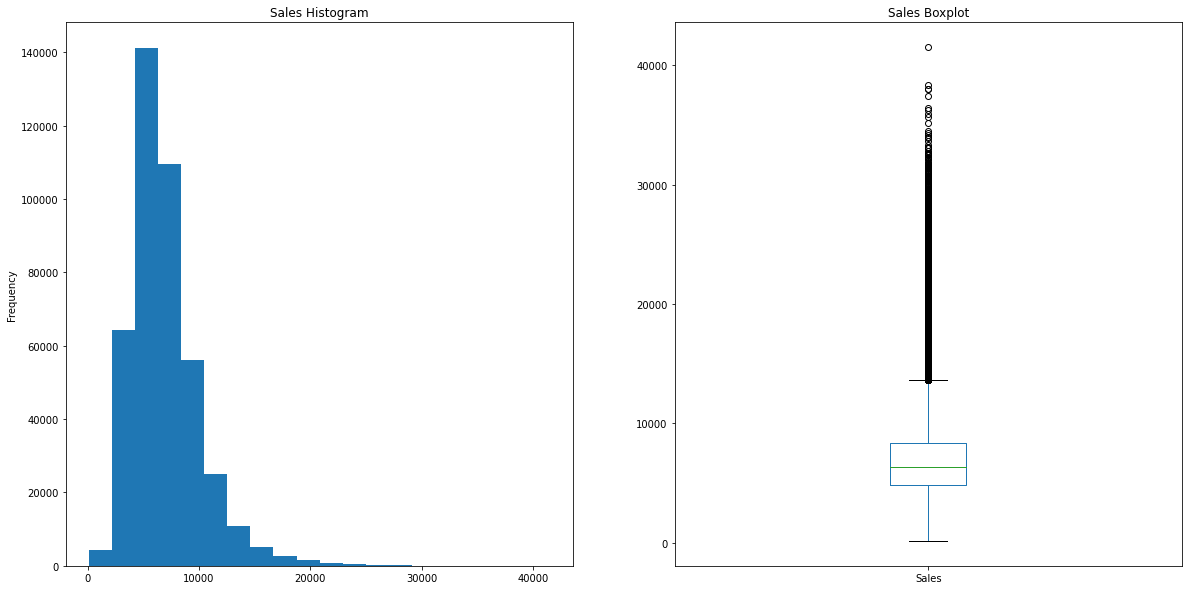

In [8]:
fig, ax = plt.subplots(1,2,figsize=(20,10))

open_sales["Sales"].plot(kind = "hist", title = "Sales Histogram", bins=20,ax = ax[0])
open_sales["Sales"].plot(kind="box",title = "Sales Boxplot",ax = ax[1])

In [9]:
### Count of how many times has rossmann store made sales over 10000 euros 

a = open_sales.Sales[open_sales["Sales"] >= 10000].count() 
print("Number of times Rossmann has made sales oer 10,000 Euros in span of 2 years and 7 months is",a)

Number of times Rossmann has made sales oer 10,000 Euros in span of 2 years and 7 months is 56790


In [10]:
print ("Or we can say that Rossmann was able to make sales", round((a / open_sales.shape[0]) * 100,2),"% over 10,000 Euros") 

Or we can say that Rossmann was able to make sales 13.45 % over 10,000 Euros


In [11]:
### Details regarding Highest sales made by Rossmann store

open_sales[open_sales["Sales"]>= 40000]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
44393,909,1,2015-06-22,41551,1721,1,0,0,0


In [12]:
print("Highest sales made by Rossmann store in a day is",open_sales["Sales"].max(),"Euros")

Highest sales made by Rossmann store in a day is 41551 Euros


In [13]:
### Let's look into customers because they are the important ascpet for sales

train["Customers"].describe()

count    1.017209e+06
mean     6.331459e+02
std      4.644117e+02
min      0.000000e+00
25%      4.050000e+02
50%      6.090000e+02
75%      8.370000e+02
max      7.388000e+03
Name: Customers, dtype: float64

<AxesSubplot:title={'center':'Customers Boxplot'}>

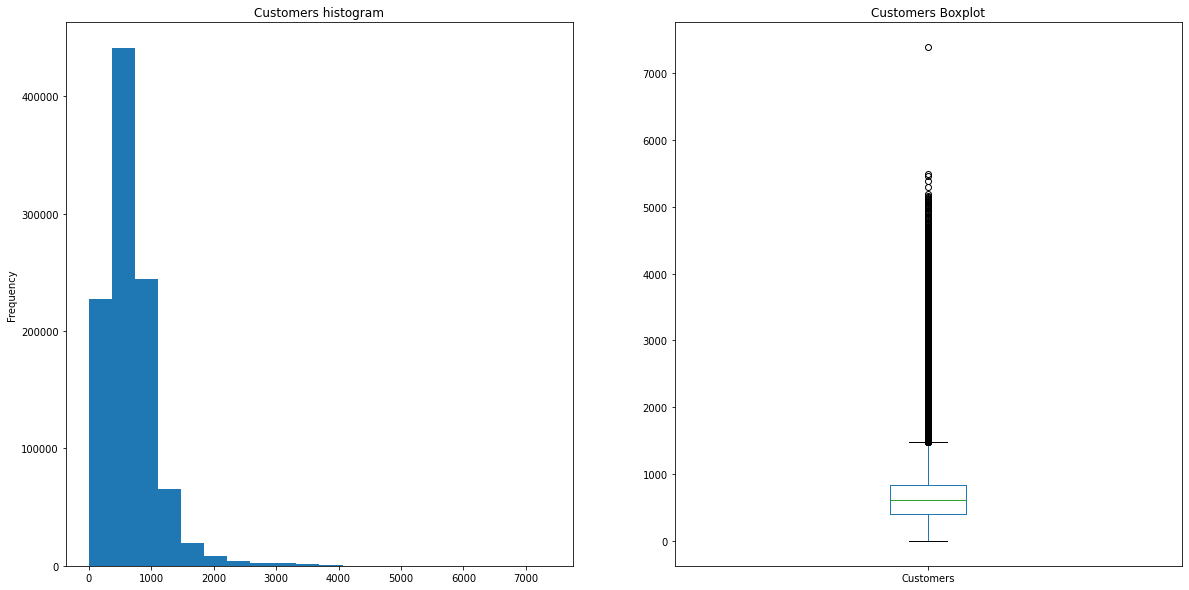

In [14]:
fig , ax = plt.subplots(1,2, figsize= (20,10))
train["Customers"].plot(kind="hist", title = "Customers histogram", bins =20, ax = ax[0])
train["Customers"].plot(kind = "box",title = "Customers Boxplot",ax = ax[1])

In [15]:
### Now let's see on which day did Rossmann had highest customers and how many customers did they have. 

train[train["Customers"] > 6000]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
993496,817,2,2013-01-22,27190,7388,1,1,0,0


In [16]:
print("Highest number of footfalls in a day in Rossmann store is",train["Customers"].max())

Highest number of footfalls in a day in Rossmann store is 7388


In [17]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [18]:
### Number of days stores were closed because of state holidays like public holidays, Easter Holidays and Christmas.

print("Total number of days Rossmann stores was closed in the span of three years was",train[train.Open==0].shape[0],"\n \n")


print("Out of total number of days Rossmann stores were closed due to State Holidays was",train[(train.Open ==0) & 
                                                                                                 ((train.StateHoliday== "a") | 
                                                                                                  (train.StateHoliday== "b") | 
                                                                                                  (train.StateHoliday== "c"))].count()[0],"\n")

print("And due of school holidays was",train[(train.Open==0) & (train.SchoolHoliday==1)].shape[0],"\n")

print("Number of times stores were closed on sundays",train[(train.Open == 0) & (train.DayOfWeek==7)].shape[0],"\n")


Total number of days Rossmann stores was closed in the span of three years was 172817 
 

Out of total number of days Rossmann stores were closed due to State Holidays was 30140 

And due of school holidays was 18264 

Number of times stores were closed on sundays 141137 



#### From the info about the dataset we StateHoliday is object and for us it's not important to know which holiday it is. So we will convert all types of holidays like Easter, Christmas and Public holidays into 0 and 1. Where 0 would mean no StateHoliday and 1 would be StateHoliday

#### We will use Empirical Cumulative Distribution Function to know about the sales, sales per cutomers for the store

In [21]:
### So we will creat new variable sales per cutomers by copying the train data 
train1 = train.copy()

In [22]:
train1["SalesPerCustomer"] = train1["Sales"]/train["Customers"] 

In [23]:
train1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer
0,1,5,2015-07-31,5263,555,1,1,0,1,9.482883
1,2,5,2015-07-31,6064,625,1,1,0,1,9.702400
2,3,5,2015-07-31,8314,821,1,1,0,1,10.126675
3,4,5,2015-07-31,13995,1498,1,1,0,1,9.342457
4,5,5,2015-07-31,4822,559,1,1,0,1,8.626118


In [24]:
#### Importing library for ECDF
from statsmodels.distributions.empirical_distribution import ECDF

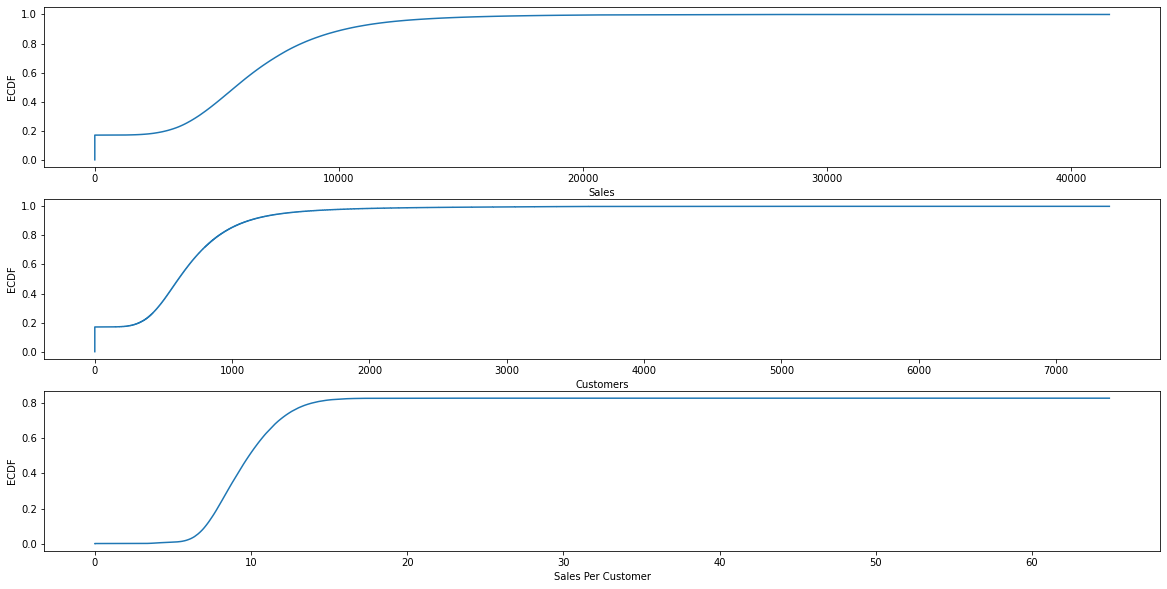

In [25]:
plt.figure(figsize=(20,10))

plt.subplot(311)
ecdf1 = ECDF(train1["Sales"])
plt.plot(ecdf1.x,ecdf1.y)
plt.xlabel("Sales")
plt.ylabel("ECDF")

plt.subplot(312)
ecdf2 = ECDF(train1["Customers"])
plt.plot(ecdf2.x,ecdf2.y)
plt.xlabel("Customers")
plt.ylabel("ECDF")

plt.subplot(313)
ecdf3 = ECDF(train1["SalesPerCustomer"])
plt.plot(ecdf3.x,ecdf3.y)
plt.xlabel("Sales Per Customer")
plt.ylabel("ECDF")

plt.subplots_adjust(wspace=0.5)

#### From the above plots of Empherical Cumulative Distribution function plot we can interpret that almost 20% of 
#### Rossmann stores data has zero sales

#### And 80% of the times Rossmann stores have made sales amount less than 10000.

In [26]:
### As we see there were stores with zero sales 
### We will remove the data where stores were closed and sales were zero because it won't be useful for forecasting
print("Number of stores which were closed and didn't made sales on that day won't be cosnidered for forecasting are",train1[(train1.Open==0) & (train1.Sales==0)].shape[0])

Number of stores which were closed and didn't made sales on that day won't be cosnidered for forecasting are 172817


In [27]:
#### Let's drop 172817 number of rows from the data as they are of no use
index = train1[(train1.Open==0) & (train1.Sales==0)].index
train1.drop(index,inplace = True)

In [28]:
train1[(train1.Open==0) & (train1.Sales==0)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer


In [29]:
train1[(train1.Open==1) & (train1.Sales==0)].shape

(54, 10)

#### Intrestingly there were 54 days when stores were opened but made 0 sales. So we can assume it might be because of external factors.

<AxesSubplot:title={'center':'Sales No-Promotions VS Promotions'}, xlabel='Promo', ylabel='Sales'>

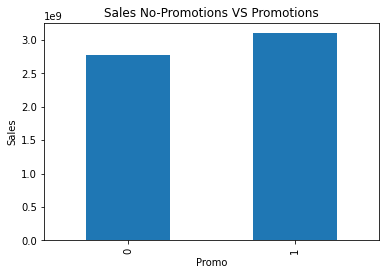

In [30]:
#### Let's compare amount of sales made on promotion days VS non-promotion days
train1.groupby("Promo")["Sales"].sum().plot(kind="bar", ylabel="Sales",title = "Sales No-Promotions VS Promotions")

#### We can see from the above graph that Large amount of sales were made by Rossmann stores when Promotions were applied in the stores.

In [31]:
#### Let's dive into store dataset
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


#### Short discription about the data

#### Store: Unique Id to each store.
#### StoreType: Differentiates between 4 different store models.
#### Assortment: Describe an assortment level: a = basic, b = extra, c= extended.
#### CompetitionDistance: Distance in meters to the nearest competitor store.
#### CompetitionOpenSinceMonth: Gives the approximate Month of the time the nearest competitor was opened.
#### CompetitionOpenSinceYear: Gives the approximate Year of the time the nearest competitor was opened.
#### Promo2: It is continuing and consecutive promotion for some stores. (0: Store is not participating, 1: Store is participating)
#### Promo2SinceWeek: Describes the calendar week when the store started participating in Promo2.
#### Promo2SinceYear: Describes the year when the store started participating in Promo2.
#### PromoInterval: describes the consecutive intervals Promo2 is started, naming the months the promotion is started a new. 
####                 E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store.



In [32]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [33]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [34]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [35]:
store[store["CompetitionDistance"].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


<AxesSubplot:ylabel='CompetitionDistance'>

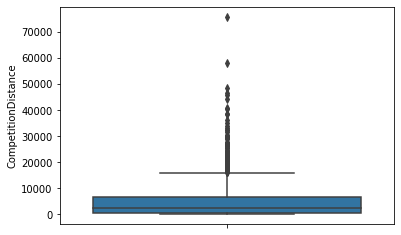

In [36]:
sns.boxplot(y="CompetitionDistance",data=store)

#### As we can see so many outliers from the above boxplot it would be better to replace missing values by median rather than mean

In [37]:
#### Replacing the missing values in CompetitionDistance by median
store["CompetitionDistance"].fillna(store["CompetitionDistance"].median(), inplace = True)

In [38]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

#### We have successfully replaced the missing values by median

In [39]:
store[store["CompetitionOpenSinceMonth"].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


#### Number of NaN values in CompetitionOpenSinceMonth and CompetitionOpenSinceYear are same 354
#### They have NaN values because there might be no competetion since months and years
#### So let's replace the NaN values in CompetitionOpenSinceMonth and CompetitionOpenSinceYear with zero

In [40]:
store["CompetitionOpenSinceMonth"].fillna(0, inplace=True)

In [41]:
store["CompetitionOpenSinceYear"].fillna(0, inplace=True)

In [42]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [43]:
store[store["Promo2"]==0].shape

(544, 10)

#### As we can see that Promo2 has 544 times zero and Promo2SinceWeek and Promo2SinceYear has 544 times null values  
#### So from this we can say that as Promo2 is zero then Promo2SinceWeek , Promo2SinceYear and PromoInterval will be zero
#### Replacing the null value in Promo2SinceWeek, Promo2SinceYear and PromoInterval with Zero

In [44]:
store["Promo2SinceWeek"].fillna(0,inplace=True)

In [45]:
store["Promo2SinceYear"].fillna(0,inplace=True)

In [46]:
store["PromoInterval"].fillna(0,inplace=True)

In [47]:
store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

#### We have cleaned the Store dataset

#### Now Let's merge the training and Store Dataset

In [48]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [49]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


#### Now Let's merge training and store dataset for further analysis

In [50]:
#### Mergeing the training and store dataset with left join 
train_store = pd.merge(train1, store, how = "inner", on = "Store")

In [51]:
train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844392 non-null  int64  
 1   DayOfWeek                  844392 non-null  int64  
 2   Date                       844392 non-null  object 
 3   Sales                      844392 non-null  int64  
 4   Customers                  844392 non-null  int64  
 5   Open                       844392 non-null  int64  
 6   Promo                      844392 non-null  int64  
 7   StateHoliday               844392 non-null  object 
 8   SchoolHoliday              844392 non-null  int64  
 9   SalesPerCustomer           844340 non-null  float64
 10  StoreType                  844392 non-null  object 
 11  Assortment                 844392 non-null  object 
 12  CompetitionDistance        844392 non-null  float64
 13  CompetitionOpenSinceMonth  84

In [52]:
train_store.shape

(844392, 19)

In [53]:
train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844392 non-null  int64  
 1   DayOfWeek                  844392 non-null  int64  
 2   Date                       844392 non-null  object 
 3   Sales                      844392 non-null  int64  
 4   Customers                  844392 non-null  int64  
 5   Open                       844392 non-null  int64  
 6   Promo                      844392 non-null  int64  
 7   StateHoliday               844392 non-null  object 
 8   SchoolHoliday              844392 non-null  int64  
 9   SalesPerCustomer           844340 non-null  float64
 10  StoreType                  844392 non-null  object 
 11  Assortment                 844392 non-null  object 
 12  CompetitionDistance        844392 non-null  float64
 13  CompetitionOpenSinceMonth  84

In [54]:
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,9.194139,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,9.143403,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,8.948214,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,9.970588,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [55]:
#### As we can see that there are different StoreType let's explore them
print("There are four types of Store", train_store["StoreType"].unique())


There are four types of Store ['c' 'a' 'd' 'b']


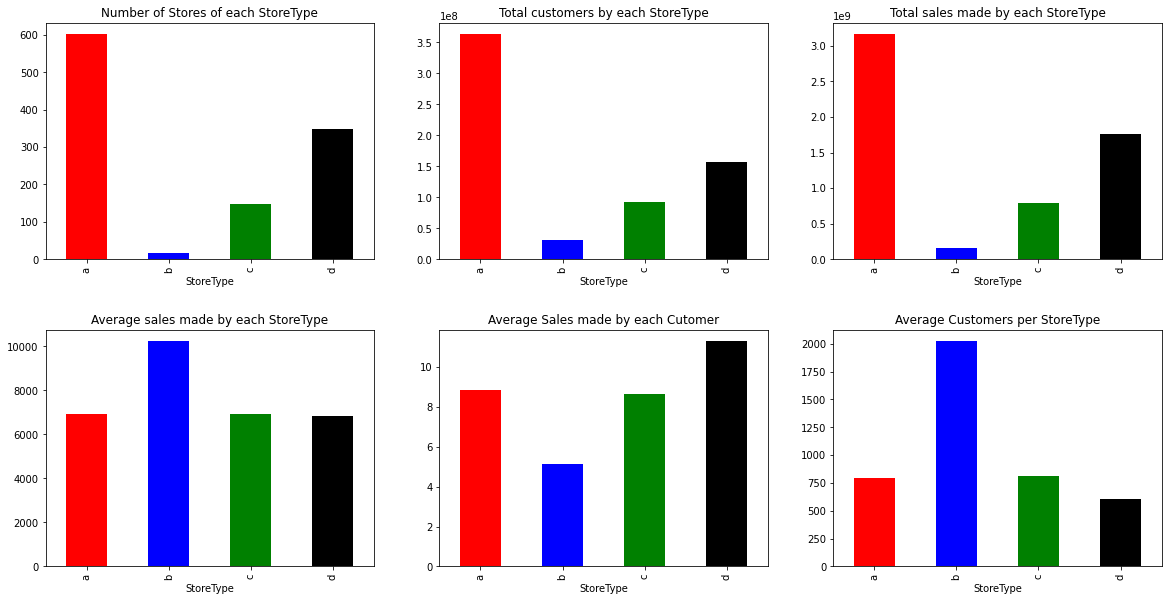

In [56]:
#### Let's see how different types of store perform with repsect to sales and customers

f, ax = plt.subplots(2, 3, figsize = (20,10))

store.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Number of Stores of each StoreType", color = ["red","blue", "green","black"])
train_store.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total customers by each StoreType",color = ["red","blue", "green","black"])
train_store.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total sales made by each StoreType",color = ["red","blue", "green","black"])
train_store.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average sales made by each StoreType",color = ["red","blue", "green","black"])
train_store.groupby("StoreType")["SalesPerCustomer"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Sales made by each Cutomer",color = ["red","blue", "green","black"])
train_store.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per StoreType",color = ["red","blue", "green","black"])

plt.subplots_adjust(hspace = 0.3)
plt.show()


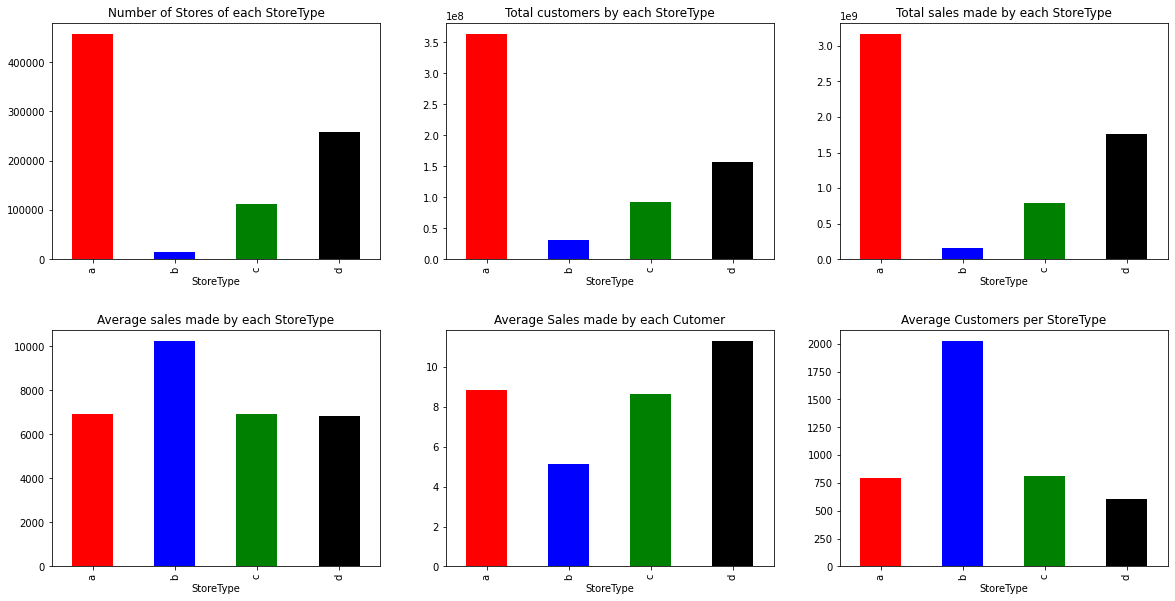

In [57]:
train_store.groupby("StoreType")["Store"].count()

f, ax = plt.subplots(2, 3, figsize = (20,10))

train_store.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Number of Stores of each StoreType", color = ["red","blue", "green","black"])
train_store.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total customers by each StoreType",color = ["red","blue", "green","black"])
train_store.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total sales made by each StoreType",color = ["red","blue", "green","black"])
train_store.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average sales made by each StoreType",color = ["red","blue", "green","black"])
train_store.groupby("StoreType")["SalesPerCustomer"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Sales made by each Cutomer",color = ["red","blue", "green","black"])
train_store.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per StoreType",color = ["red","blue", "green","black"])

plt.subplots_adjust(hspace = 0.3)
plt.show()

#### From the above bar charts we can derive that StoreType "a" has most number of stores, most number of customers have also visited that store and in comparison to all other StoreType "a" has made highest number of total sales

In [58]:
train_store.groupby("StoreType")["Store"].count()

StoreType
a    457077
b     15563
c    112978
d    258774
Name: Store, dtype: int64

#### Inspite of StoreType "b" having the least number of stores it has highest average of sales as compared to other StoreType as well as more number of Average cutomers coming to the store. 

#### StoreType "d" has made most amount of average sales

In [59]:
train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844392 non-null  int64  
 1   DayOfWeek                  844392 non-null  int64  
 2   Date                       844392 non-null  object 
 3   Sales                      844392 non-null  int64  
 4   Customers                  844392 non-null  int64  
 5   Open                       844392 non-null  int64  
 6   Promo                      844392 non-null  int64  
 7   StateHoliday               844392 non-null  object 
 8   SchoolHoliday              844392 non-null  int64  
 9   SalesPerCustomer           844340 non-null  float64
 10  StoreType                  844392 non-null  object 
 11  Assortment                 844392 non-null  object 
 12  CompetitionDistance        844392 non-null  float64
 13  CompetitionOpenSinceMonth  84

#### There are different Assortment level within different stores. Different Assortment level are describe as "a" which indicates basic assotment type, "b" indicates extra and "c" indicates extended assortment level.

In [60]:
train_store["Assortment"].unique()

array(['a', 'c', 'b'], dtype=object)

In [61]:
train_store.groupby("Assortment")["StoreType"].count()

Assortment
a    444909
b      8212
c    391271
Name: StoreType, dtype: int64

<AxesSubplot:xlabel='StoreType', ylabel='count'>

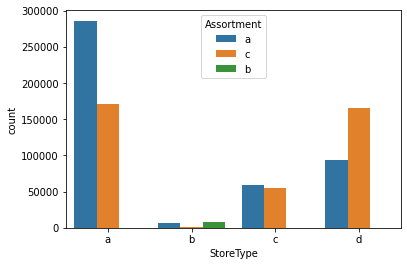

In [62]:
sns.countplot(data = train_store, x = "StoreType", hue = "Assortment",order = ["a","b","c","d"])

#### From the above count plot as we say that out of all the StoreType only StoreType "b" has Assortment level b(extra), whereas all other stores have only two assortment level a(basic) and c(extended).

In [63]:
train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844392 non-null  int64  
 1   DayOfWeek                  844392 non-null  int64  
 2   Date                       844392 non-null  object 
 3   Sales                      844392 non-null  int64  
 4   Customers                  844392 non-null  int64  
 5   Open                       844392 non-null  int64  
 6   Promo                      844392 non-null  int64  
 7   StateHoliday               844392 non-null  object 
 8   SchoolHoliday              844392 non-null  int64  
 9   SalesPerCustomer           844340 non-null  float64
 10  StoreType                  844392 non-null  object 
 11  Assortment                 844392 non-null  object 
 12  CompetitionDistance        844392 non-null  float64
 13  CompetitionOpenSinceMonth  84

In [64]:
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,9.194139,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,9.143403,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,8.948214,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,9.970588,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [65]:
#### Converting the date column from object into datetime

train_store["Date"] = train_store["Date"].astype("datetime64[ns]")

In [66]:
train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   Date                       844392 non-null  datetime64[ns]
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Open                       844392 non-null  int64         
 6   Promo                      844392 non-null  int64         
 7   StateHoliday               844392 non-null  object        
 8   SchoolHoliday              844392 non-null  int64         
 9   SalesPerCustomer           844340 non-null  float64       
 10  StoreType                  844392 non-null  object        
 11  Assortment                 844392 non-null  object  

In [67]:
train_store["Month"] = train_store["Date"].dt.month
train_store["Year"] = train_store["Date"].dt.year
train_store["Day"] = train_store["Date"].dt.day

In [68]:
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Year,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,9.482883,...,1270.0,9.0,2008.0,0,0.0,0.0,0,7,2015,31
1,1,4,2015-07-30,5020,546,1,1,0,1,9.194139,...,1270.0,9.0,2008.0,0,0.0,0.0,0,7,2015,30
2,1,3,2015-07-29,4782,523,1,1,0,1,9.143403,...,1270.0,9.0,2008.0,0,0.0,0.0,0,7,2015,29
3,1,2,2015-07-28,5011,560,1,1,0,1,8.948214,...,1270.0,9.0,2008.0,0,0.0,0.0,0,7,2015,28
4,1,1,2015-07-27,6102,612,1,1,0,1,9.970588,...,1270.0,9.0,2008.0,0,0.0,0.0,0,7,2015,27


#### As we have separate column for each day, each month and each year.
#### So let's see how according to the promo applied in that month and year is the sales of store being affected. 

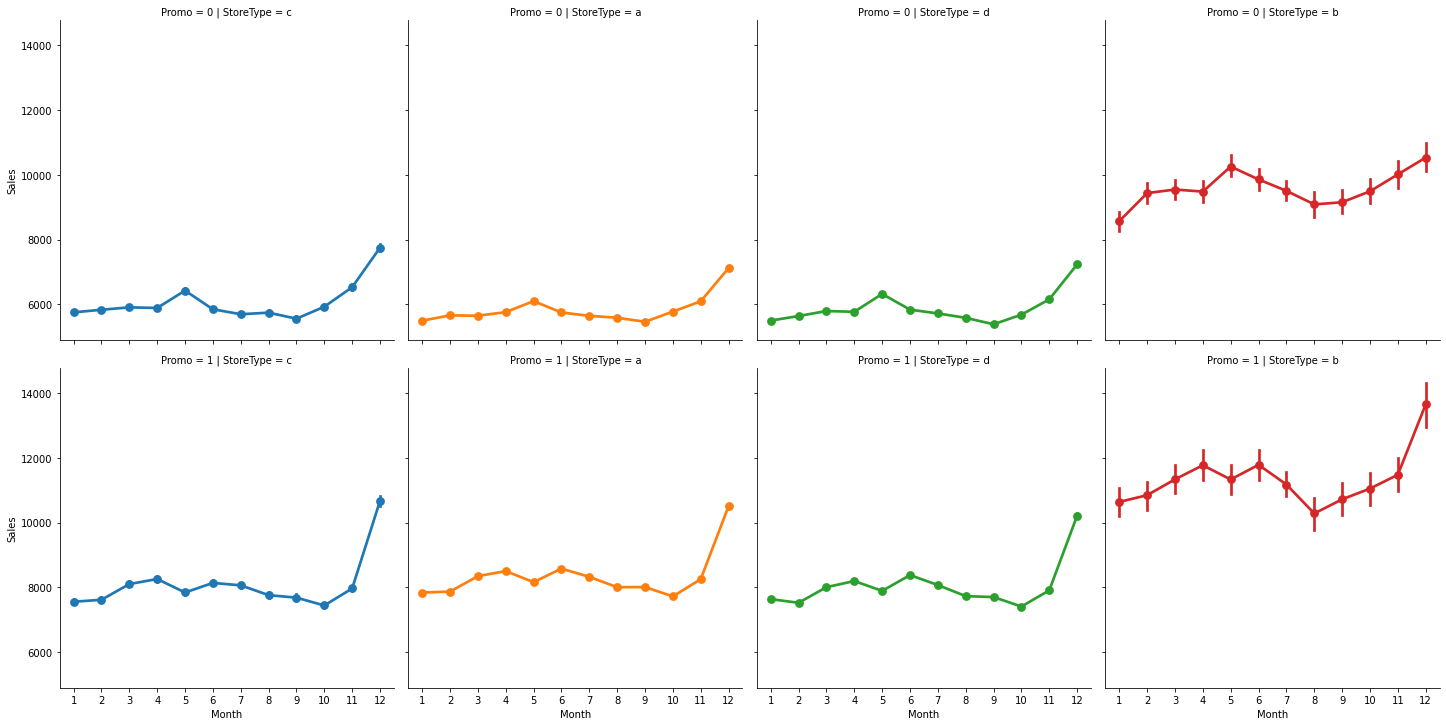

In [69]:
### Sales in each StoreType when promo is applied and not applied

sns.catplot(data = train_store, x = "Month", y ="Sales", col = "StoreType",hue = "StoreType",row = "Promo",kind = "point")

#### The above plot tells us about sales of each month of different StoreType when promo was applied on that month and when promo was not applied for that month

#### StoreType B has done more amount of sales even when promo has not been applied and also when promo has been applied. 

#### From above graph we can notice an interesting thing that sales increases for 12th month that is december and it might be because of christmas. Lets look into seasonality and trends in next few stages

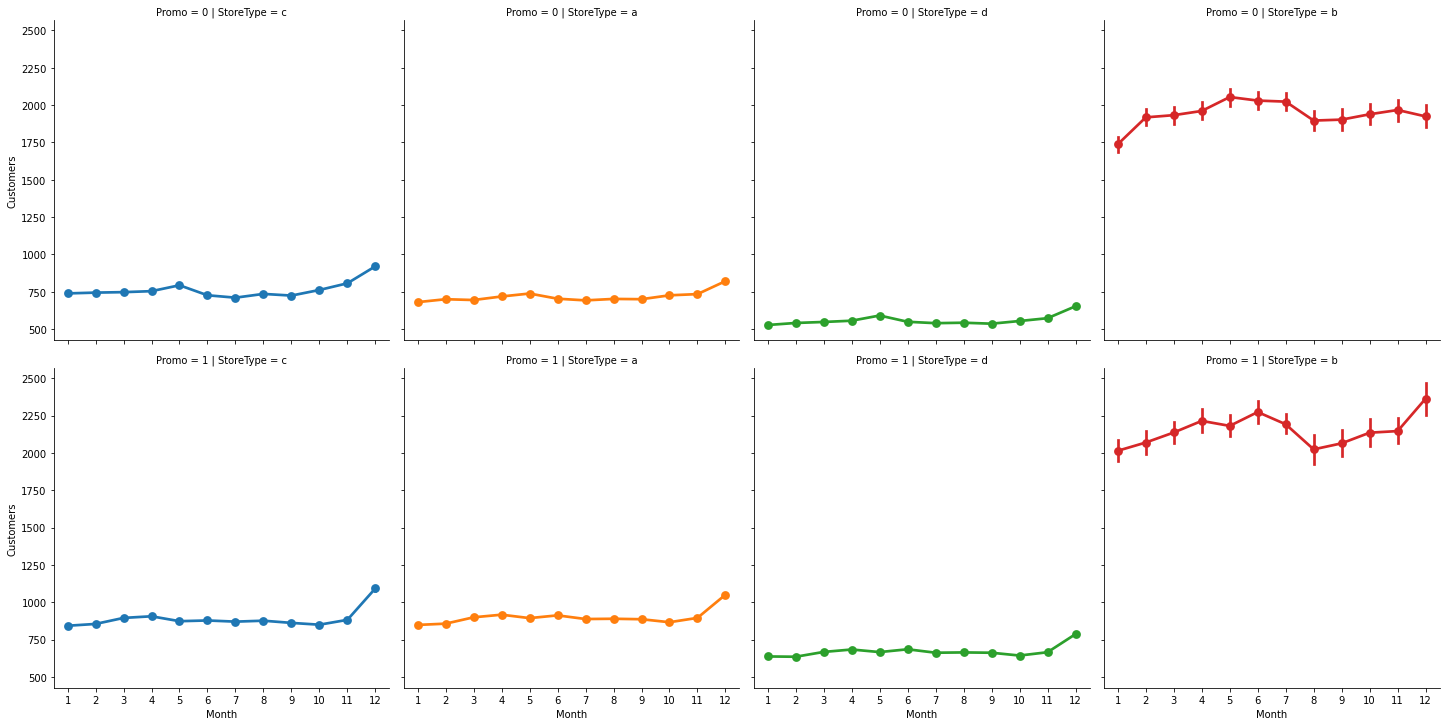

In [70]:
### Number of customers coming to different StoreType when promo is applied and not applied

sns.catplot(data = train_store, y= "Customers" , x= "Month", hue = "StoreType",col = "StoreType",row = "Promo",kind = "point")

#### As we saw before StoreType B had the most sales with and without promo as Number of Customers coming to StoreType B is the most irrespective of the promo.

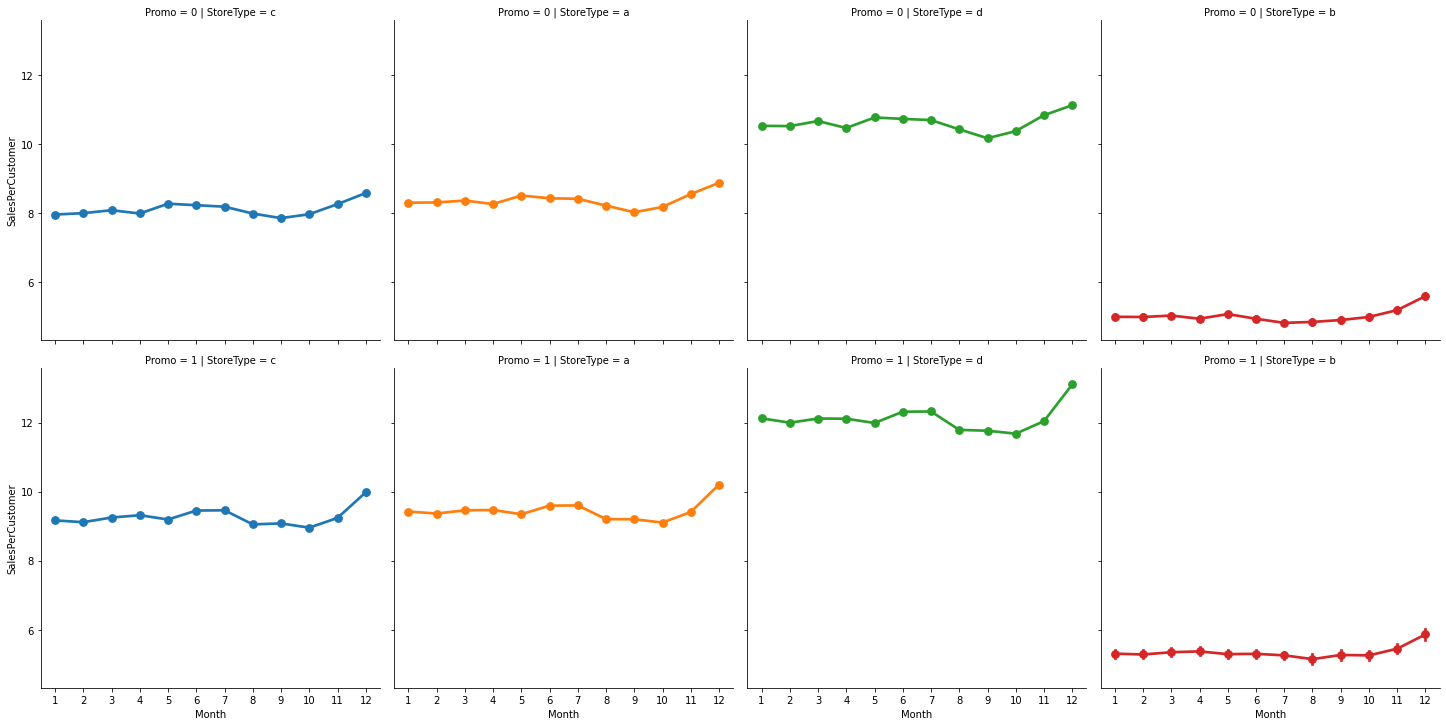

In [71]:
#### Now let's look how much sales per customer did each StoreType make

sns.catplot(data=train_store , x= "Month", y ="SalesPerCustomer", hue = "StoreType", col = "StoreType", row = "Promo", kind = "point")

#### Even though the number of customers coming to StoreType D were less and sales made by the StoreType D wasn't very good but they are the StoreType who made the most amount of sales per customer. 
#### Amount of sales made by StoreType D per customer when promo was applied is 12 Euros whereas when promo was not applied they earned around 10 Euros per customer. 
#### StoreType B has highest amount of sales and customers but the amount of sales they made per customer when promo was applied was around 5 Euros and when promo wasn't applied they made approximately 3 Euros per cutomer.

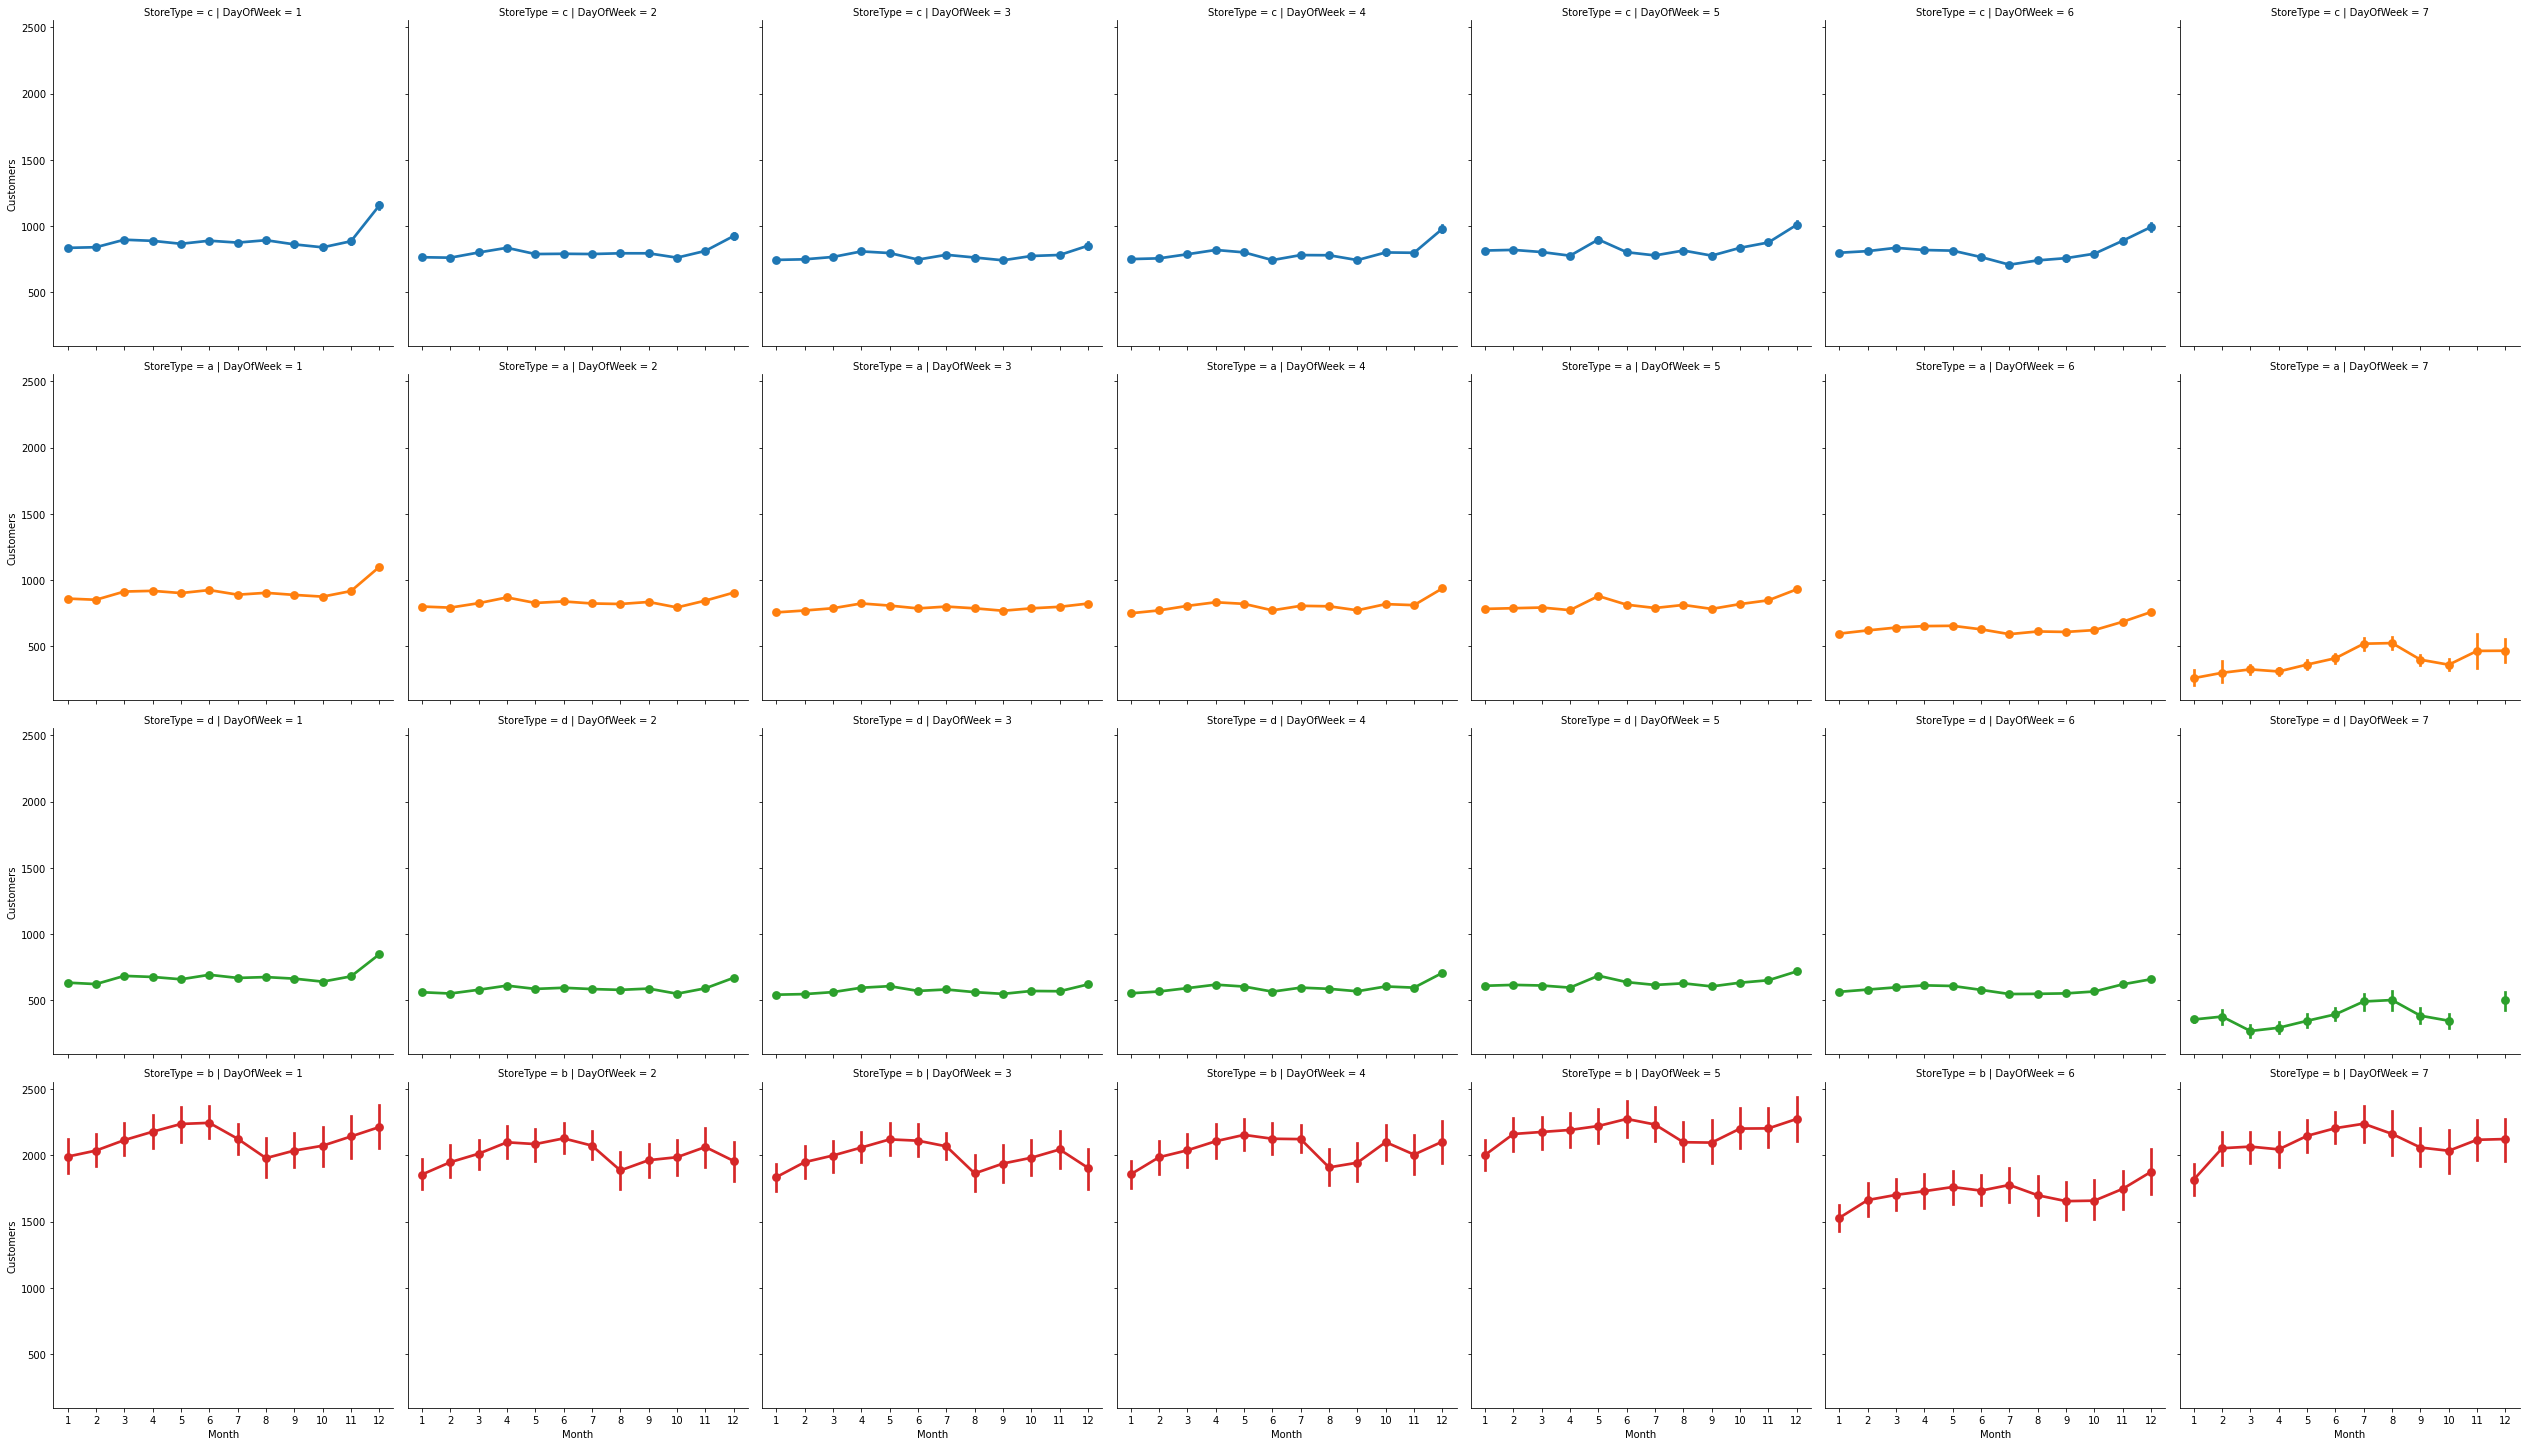

In [72]:
### Now Let's look at amount of sales made each StoreType on different days of each month

sns.catplot(data = train_store, x= "Month", y = "Customers",row = "StoreType", hue = "StoreType",col = "DayOfWeek",kind = "point")

#### Let's plot the correlation plot

In [73]:
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Year,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,9.482883,...,1270.0,9.0,2008.0,0,0.0,0.0,0,7,2015,31
1,1,4,2015-07-30,5020,546,1,1,0,1,9.194139,...,1270.0,9.0,2008.0,0,0.0,0.0,0,7,2015,30
2,1,3,2015-07-29,4782,523,1,1,0,1,9.143403,...,1270.0,9.0,2008.0,0,0.0,0.0,0,7,2015,29
3,1,2,2015-07-28,5011,560,1,1,0,1,8.948214,...,1270.0,9.0,2008.0,0,0.0,0.0,0,7,2015,28
4,1,1,2015-07-27,6102,612,1,1,0,1,9.970588,...,1270.0,9.0,2008.0,0,0.0,0.0,0,7,2015,27


In [74]:
## Exlcuding Open from 
corr = train_store.drop("Open",axis=1).corr()

## Generating a mask for the upper triangle 
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

<AxesSubplot:>

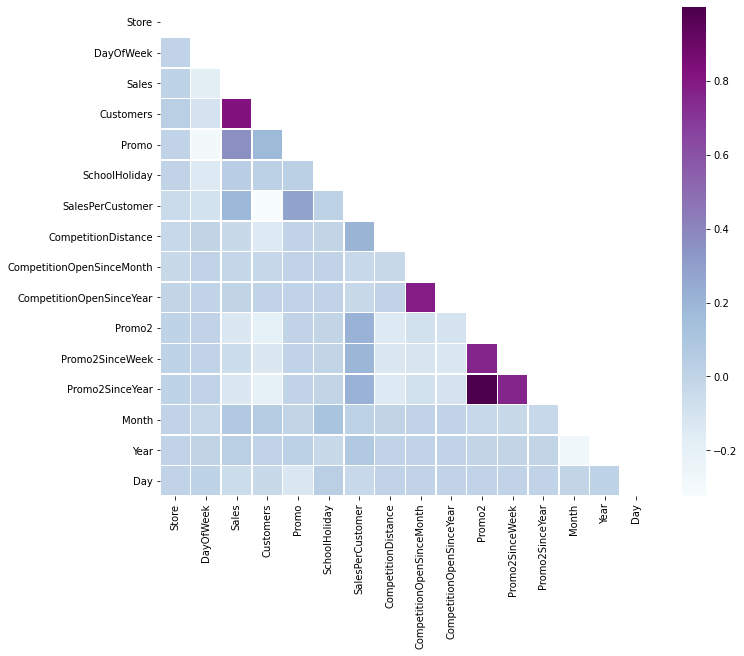

In [75]:
fig , ax = plt.subplots(figsize = (11,9))

sns.heatmap(corr, mask = mask, linewidths = 0.5,ax = ax, cmap = "BuPu")

#### There is a strong positve correlation between sales and cutomers.

#### From the above correlation plot we can see that with respect to Promo (equal to 1) sales and customer show a postive correlation as they have dark shade.

#### But as the store continues consecutive Promotion (Promo2 Equal to 1) the number of sales and customers seem to decrease. Which is describe by the pale negative correlation on the hetamap.

#### We can see a positive correlation between Promo(euqal to 1) and SalesPerCustomer

### My Conclusion from EDA

#### StoreType A is the most selling and the crowded store  
#### SalesPerCustomer is maximum for the StoreType D  irrespetive of promotion applied or not, which indicates the Higher Buyer Cart. It would be an ideal to open this kind of StoreType in rural areas where people buy many items at a time but less often. 
#### StoreType B has lowest SalesPerCustomer irrespective of promotion applied or not. This implies customers go to this store only to shop essentially small things.
#### People tend to buy more on Mondays when pormotion is applied and on Sundays when there is no promotions.
#### Promo2 has negative correlation with sales. With means there is not significant impact of Promo2 on sales.

### ARIMA Forecasting

<AxesSubplot:xlabel='Date'>

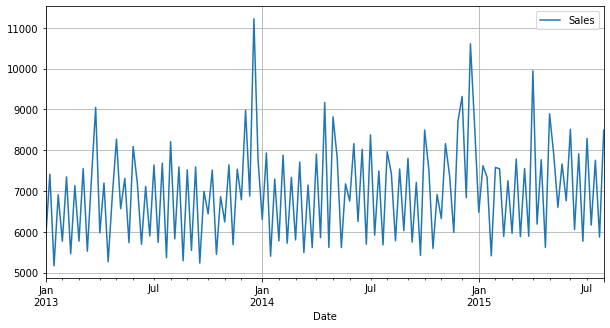

In [76]:
ts_data = train_store.set_index("Date").resample("W").mean()
ts_data = ts_data[["Sales"]]
ts_data.plot(figsize=(10,5),grid = True)

#### Stationary Time Series: It's a time series whoes statistical properties don't change over the time. Like mean, variance.
#### Non-Stationary Time Series: It's a time series whoes Statistical properties changes over the time. Thus a time series with a trend or seasonality is non_stationary in nature.

#### Now we need to check whether our data is Stationary or non-Stationary data
#### We ware using Augmented Dickey-Fuller unit root test. (It is a common Statistical test used to test whether a given Time Series is Stationary or not).
#### Augmented Dickey-Fuller test is a hypothesis test, where null hypothesis is that the time series is non-stationary, and the alternative is that the series is stationary. 

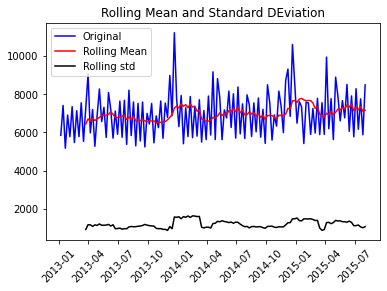

Result of Dickey-Fuller Test:
Test Statistic                -6.723656e+00
p-value                        3.432676e-09
#Lags Used                     1.000000e+00
Number of Observations Used    1.330000e+02
Critical Value (1%)           -3.480500e+00
Critical Value (5%)           -2.883528e+00
Critical Value (10%)          -2.578496e+00
dtype: float64


In [77]:
#### Using Augmented Dickey-Fuller to check whether our data is stationary or non-stationary

from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    
    ## Determing rolling statistics 
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std()
    
    ## Plot rolling statistics 
    orig = plt.plot(timeseries, color = "blue", label = "Original")
    mean = plt.plot(rolmean, color = "red", label = "Rolling Mean")
    std = plt.plot(rolstd, color = "black", label = "Rolling std")
    plt.legend(loc="best")
    plt.title("Rolling Mean and Standard DEviation")
    plt.xticks(rotation = 45)
    plt.show(block="False")
    
    
test_stationary(ts_data)

def adf_timeseries(timeseries1):
    print("Result of Dickey-Fuller Test:")
    dftest = adfuller(timeseries1,autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
adf_timeseries(ts_data)

#### From the above result obtained p-value, Test Statistics and critical value is less than 0.05 we reject the null hypothesis.
#### So we can conclude that our data is Stationary dataset.

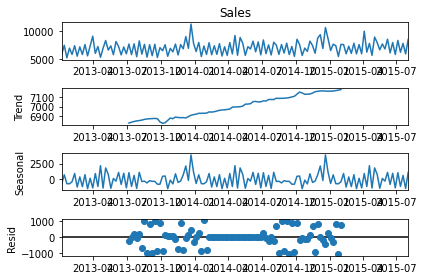

In [78]:
#### Time Series Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
series = ts_data["Sales"]
result = seasonal_decompose(series, model='additive')
result.plot()
plt.show()

#### Explanation for the above drawn graph
#### Level: The average value in the series.
#### Trend: The increasing or decreasing value in the series.
#### Seasonality: The repeating short-term cycle in the series.
#### Noise: The random variation in the series.

#### As we can see from the graph, we are dealing with a seasonal Time Series. So I need to find the right parameters for the ARIMA Model as ARIMA(p,d,q)(P,D,Q)s. Here (p,d,q) are the non-seasonal parameter, while (P,D,Q) follow the same defintion, but are for the seasonal component of the series. The term s, is the periodicity (4 for the quarerly periods, 12 for yearly periods, etc.)

#### p is the auto-regressive part of the model. It allows us to incorporate the effect of past values into our model. Intuitively, this would be similar to stating that it is likely to be warm tomorrow if it has been warm the past 3 days.

#### d is the integrated part of the model. This includes terms in the model that incorporate the amount of differencing (i.e. the number of past time points to subtract from the current value) to apply to the time series. Intuitively, this would be similar to stating that it is likely to be same temperature tomorrow if the difference in temperature in the last three days has been very small.

#### q is the moving average part of the model. This allows us to set the error of our model as a linear combination of the error values observed at previous time points in the past.

In [79]:
import warnings
import itertools
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt

# Let's begin by generating the various combination of parameters that we wish to assess:

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


#### Lets iterate through some combinations of paramter and use the SARIMAX function to get AIC Score. Lowest AIC value is optimal option for our model

In [80]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2758.376473500445
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2442.271263557888
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2182.959421090318
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1929.3167714923393
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2203.743698132475
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2162.6354053663636
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1954.4352162224814
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1930.2161165051723
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2668.7566203378037
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2344.2606694683905
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2157.137284565173
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1901.4242538043138
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2198.5555382476105
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2139.1230506305833
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1942.8377682353128
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1901.3130221466402
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2399.53422109695
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2180.3374778670827

#### As we can see from the above obtained result ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1847.5087433774315 have the lowest AIC score. So we will choose this as our p,d,q value.

In [81]:
mod = sm.tsa.statespace.SARIMAX(ts_data,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5577      0.090     -6.229      0.000      -0.733      -0.382
ma.L1         -0.7300      0.060    -12.221      0.000      -0.847      -0.613
ar.S.L12      -0.1579      0.133     -1.186      0.236      -0.419       0.103
ma.S.L12      -1.0328      0.663     -1.559      0.119      -2.331       0.266
sigma2      1.199e+06   8.76e+05      1.370      0.171   -5.17e+05    2.92e+06


#### The column P>|z| tells us about the significance of each feature.
#### The coef column tells us about the importance of each feature and how it impacts the the time series.

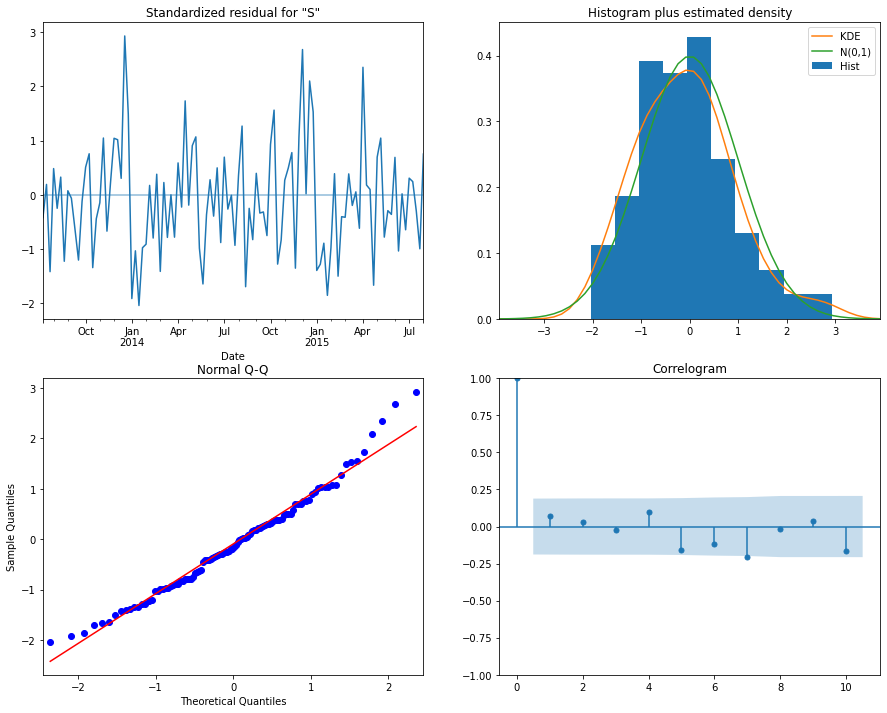

In [82]:
results.plot_diagnostics(figsize=(15,12))
plt.show()

#### The Top left graph: The residual errors seem to fluctuate around the mean of zero and have uniform variance.

#### The Top right graph: From density plot we can see that KDE line follows N(0,1) line, where N(0,1) is the standard notion for a normal distribution with mean 0 and standard deviation 1. This is a good indication that the residuals are normally distributed. 

#### The Bottom left graph: All the dots should fall perfectly in line with the red line. As all the dots fall on the red line it is a strong indication that the residuals are normally distributed and there isn't any skewness.

#### The Bottom right graph: The Correlogram plot shows the residual errors have low correlation. So if they are highly correlated it would imply that resiudal errors have some sort seasonality. 

#### Overall, it seems to be good fit. Now let's forecast

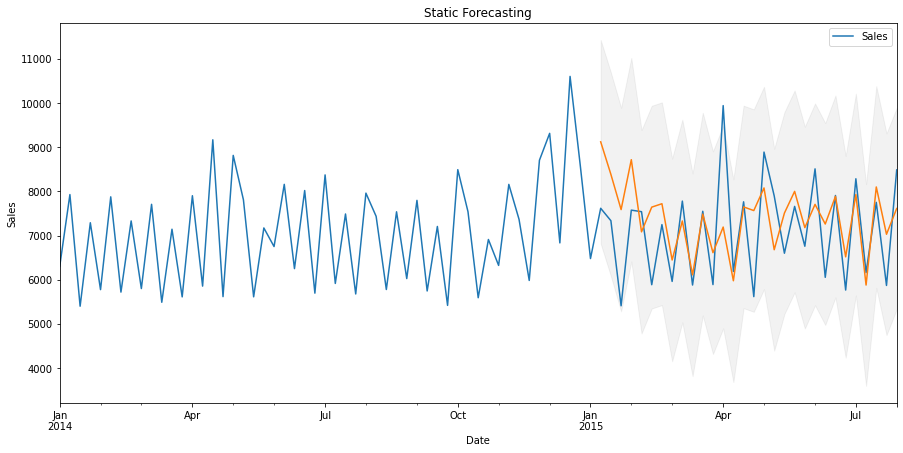

RMS: 1060.2381311188096


In [83]:
#### Let's do Static forecasting

pred = results.get_prediction(start = pd.to_datetime("2015-01-11"), dynamic = False) 
# lets start the fc to start from 1.11.2015. 
# The dynamic=False argument ensures that we produce one-step ahead forecasts, meaning that forecasts at each point are generated using the full history up to that point.
pred_ci = pred.conf_int() # Get confidence intervals of forecasts

ax = ts_data["2014":].plot(label = "observed", figsize=(15, 7))
pred.predicted_mean.plot(ax = ax, label = "One-step ahead FC", alpha = 1)
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], 
                color = "k", alpha = 0.05)

ax.set_xlabel("Date")
ax.set_ylabel("Sales")
ax.title.set_text("Static Forecasting")

plt.legend
plt.show()

# -----------
#  extract the predicated and true values of our time series
ts_forecasted = pred.predicted_mean
ts_truth = ts_data["2015-01-11":]
# to use, in my case, the mean squared error:
rms_arima = sqrt(mean_squared_error(ts_truth, ts_forecasted))
print("RMS:", rms_arima) 

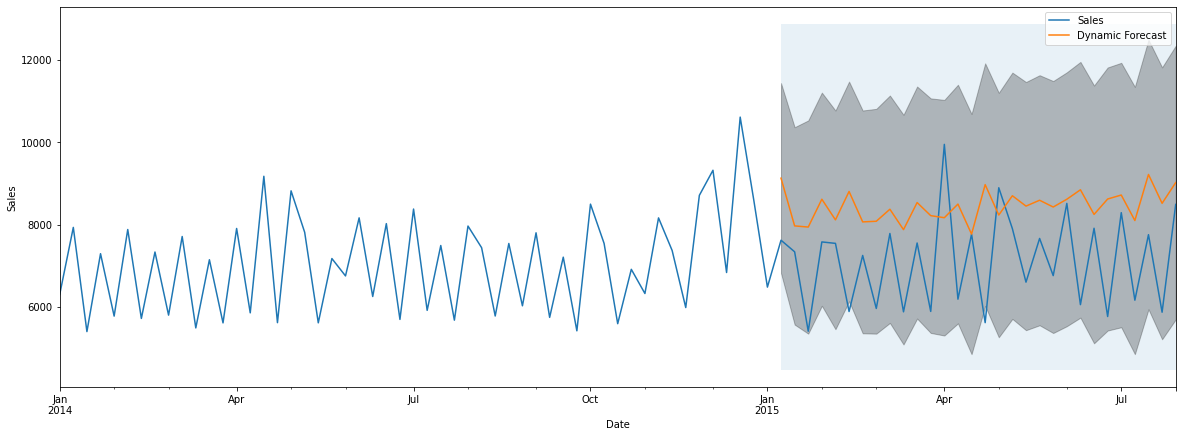

RMS: 1749.8692549321354


In [84]:
# lets try a dynamic forecast. In this case we will use information from the time series up to a certain point, to generate future values.
pred_dynamic = results.get_prediction(start = pd.to_datetime("2015-01-11"), dynamic = True, full_results = True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax = ts_data["2014":].plot(label = "observed", figsize = (20, 7))
pred_dynamic.predicted_mean.plot(label ="Dynamic Forecast", ax = ax)

ax.fill_between(pred_dynamic_ci.index,
               pred_dynamic_ci.iloc[:, 0],
               pred_dynamic_ci.iloc[:, 1], color ="k", alpha = 0.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime("2015-01-11"), ts_data.index[-1],
                alpha = 0.1, zorder =-1)

ax.set_xlabel("Date")
ax.set_ylabel("Sales")

plt.legend()
plt.show()

# -----------
#  extract the predicated and true values of our time series
ts_forecasted = pred_dynamic.predicted_mean
ts_truth = ts_data["2015-01-11":]
# to use, in my case, the mean squared error:
rms_arima_dynamic = sqrt(mean_squared_error(ts_truth, ts_forecasted))
print("RMS:", rms_arima_dynamic) 

#### The Forecasting accuracy hasn't improved that much

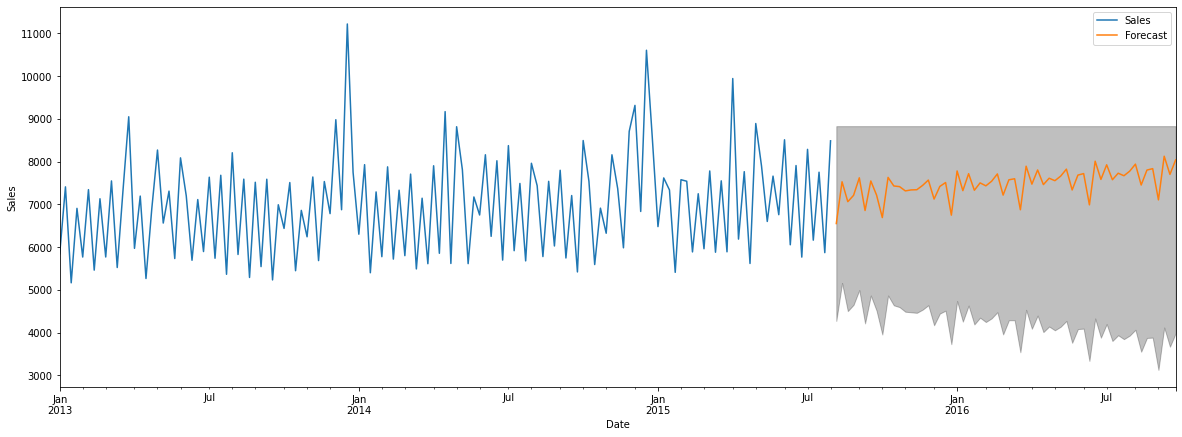

In [85]:
#### Now let's forecast for next few periods 

pred_uc = results.get_forecast(steps = 60) 
pred_ci = pred_uc.conf_int() # Get confidence intervals of forecasts

ax = ts_data.plot(label = "observed", figsize = (20,7))
pred_uc.predicted_mean.plot(ax = ax, label = "Forecast")
ax.fill_between(pred_ci.index, 
               pred_ci.iloc[:, 0],
               pred_ci.iloc[0, 1], color = "k", alpha = 0.25)
ax.set_xlabel("Date")
ax.set_ylabel("Sales")

plt.legend()
plt.show()

### Forecasting using Facebook Prophet

In [86]:
from prophet import Prophet

In [87]:
ts_prophet1 = train_store.loc[:,["Date","Sales"]]
ts_prophet1.head()

,Date,Sales
0,2015-07-31,5263
1,2015-07-30,5020
2,2015-07-29,4782
3,2015-07-28,5011
4,2015-07-27,6102


In [88]:
ts_prophet1.sort_values(by = "Date")

,Date,Sales
266124,2013-01-01,3139
510811,2013-01-01,3821
206921,2013-01-01,3102
197575,2013-01-01,17267
387259,2013-01-01,2646
...,...,...
637225,2015-07-31,6444
475845,2015-07-31,7544
323314,2015-07-31,6999
173401,2015-07-31,5738


In [89]:
ts_prophet1 = ts_prophet1.rename(columns = {"Date":"ds","Sales":"y"})
ts_prophet1.head()

,ds,y
0,2015-07-31,5263
1,2015-07-30,5020
2,2015-07-29,4782
3,2015-07-28,5011
4,2015-07-27,6102


In [90]:
m = Prophet()

In [91]:
m.fit(ts_prophet1)

08:23:34 - cmdstanpy - INFO - Chain [1] start processing
08:30:52 - cmdstanpy - INFO - Chain [1] done processing


In [92]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1302,2016-07-26
1303,2016-07-27
1304,2016-07-28
1305,2016-07-29
1306,2016-07-30


In [93]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1302,2016-07-26,6395.827231,-13564.508064,24866.225457
1303,2016-07-27,6052.099150,-13958.629597,25247.724110
1304,2016-07-28,6114.188693,-13782.688170,24384.180845
1305,2016-07-29,6408.483697,-13602.255042,25269.279591
1306,2016-07-30,5197.020266,-15624.066951,23977.727615


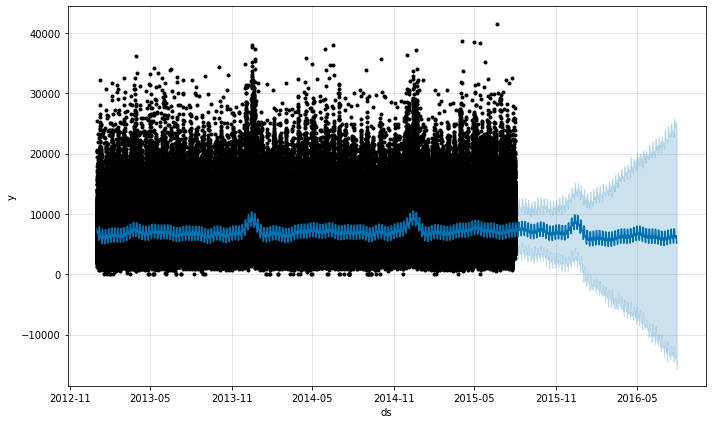

In [94]:
fig1 = m.plot(forecast)

In [95]:
from prophet import Prophet

In [96]:
#### Forecasting considering holidays
train_store.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'SalesPerCustomer', 'StoreType',
       'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Month', 'Year', 'Day'],
      dtype='object')

In [97]:
ts_prophet = train_store.drop(['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo',
         'SalesPerCustomer', 'StoreType',
       'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Month', 'Year', 'Day'], axis = 1)

ts_prophet.head()

,Date,Sales,StateHoliday,SchoolHoliday
0,2015-07-31,5263,0,1
1,2015-07-30,5020,0,1
2,2015-07-29,4782,0,1
3,2015-07-28,5011,0,1
4,2015-07-27,6102,0,1


In [98]:
 ts_prophet = ts_prophet.rename(columns = {"Date": "ds",
                          "Sales": "y"})

ts_prophet.tail()

,ds,y,StateHoliday,SchoolHoliday
844387,2013-01-07,9291,0,0
844388,2013-01-05,2748,0,0
844389,2013-01-04,4202,0,1
844390,2013-01-03,4580,0,1
844391,2013-01-02,5076,0,1


In [99]:
state_dates = ts_prophet[(ts_prophet.StateHoliday == 'a') | (ts_prophet.StateHoliday == 'b') & (ts_prophet.StateHoliday == 'c')].loc[:, 'ds'].values
school_dates = ts_prophet[ts_prophet.SchoolHoliday == 1].loc[:, 'ds'].values

state = pd.DataFrame({'holiday': 'state_holiday',
                      'ds': pd.to_datetime(state_dates)})
school = pd.DataFrame({'holiday': 'school_holiday',
                      'ds': pd.to_datetime(school_dates)})

holidays = pd.concat((state, school))      
holidays

,holiday,ds
0,state_holiday,2014-10-03
1,state_holiday,2013-10-03
2,state_holiday,2015-06-04
3,state_holiday,2014-06-19
4,state_holiday,2013-05-30
...,...,...
163452,school_holiday,2013-02-05
163453,school_holiday,2013-02-04
163454,school_holiday,2013-01-04
163455,school_holiday,2013-01-03


In [100]:
ts_prophet = ts_prophet.drop(["SchoolHoliday","StateHoliday"],axis =1)
ts_prophet.head()

,ds,y
0,2015-07-31,5263
1,2015-07-30,5020
2,2015-07-29,4782
3,2015-07-28,5011
4,2015-07-27,6102


In [101]:
m1 = Prophet(holidays = holidays)
forecast1 = m1.fit(ts_prophet).predict(future)

08:31:27 - cmdstanpy - INFO - Chain [1] start processing
08:37:48 - cmdstanpy - INFO - Chain [1] done processing


In [102]:
forecast1[["ds","yhat","yhat_lower","yhat_upper"]].head()

,ds,yhat,yhat_lower,yhat_upper
0,2013-01-01,8162.259816,4460.347124,12189.606460
1,2013-01-02,6720.033922,2667.699496,10357.194615
2,2013-01-03,6649.273459,2800.593436,10399.746405
3,2013-01-04,6849.366829,3078.315568,10721.678958
4,2013-01-05,5800.987872,2103.497038,9785.340919


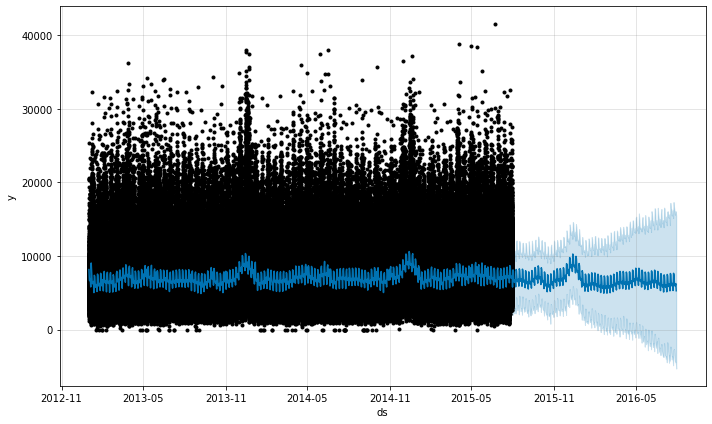

In [104]:
fig1 = m1.plot(forecast1)

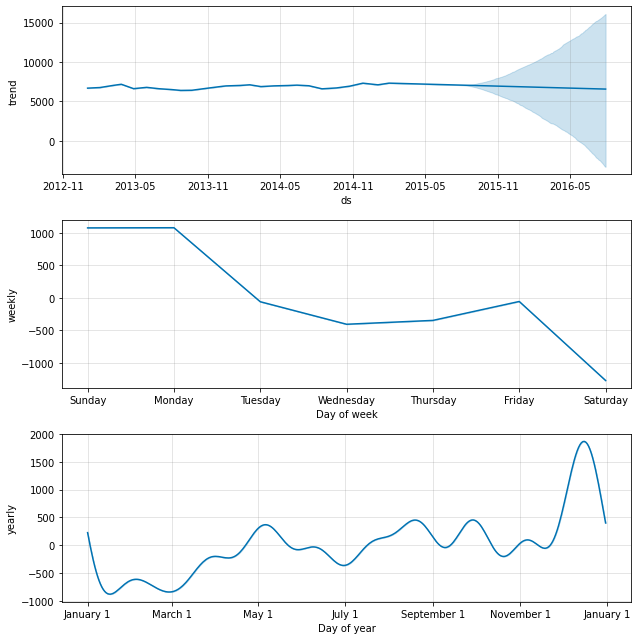

In [105]:
fig = m.plot_components(forecast1)

In [106]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='365 days', period='180 days', horizon = '183 days')

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/3 [00:00<?, ?it/s]

08:44:04 - cmdstanpy - INFO - Chain [1] start processing
08:46:04 - cmdstanpy - INFO - Chain [1] done processing
08:47:49 - cmdstanpy - INFO - Chain [1] start processing
08:50:56 - cmdstanpy - INFO - Chain [1] done processing
08:52:07 - cmdstanpy - INFO - Chain [1] start processing
08:57:19 - cmdstanpy - INFO - Chain [1] done processing


In [107]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-02-04,7170.67951,3486.514457,10914.555053,7864,2014-02-03
1,2014-02-04,7170.67951,3351.685049,10978.871454,9857,2014-02-03
2,2014-02-04,7170.67951,3129.422236,11032.310626,9001,2014-02-03
3,2014-02-04,7170.67951,3369.554373,10782.432112,7129,2014-02-03
4,2014-02-04,7170.67951,3483.632332,10979.138291,8505,2014-02-03


In [108]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mdape,smape,coverage
0,18 days,9.423892e+06,3069.835784,2439.491927,0.307736,0.345180,0.846941
1,19 days,9.563907e+06,3092.556665,2475.489606,0.318555,0.353010,0.849901
2,20 days,9.475894e+06,3078.294047,2469.791656,0.320784,0.352749,0.851545
3,21 days,1.054025e+07,3246.575226,2595.332114,0.341854,0.369866,0.840573
4,22 days,1.142747e+07,3380.454594,2701.836019,0.358647,0.382799,0.837779


In [109]:
df_p["rmse"].mean()

29848.96431201528

In [110]:
print("RMSE of Facebook Prophet:",df_p["rmse"].mean())

RMSE of Facebook Prophet: 29848.96431201528


In [111]:
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Year,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,9.482883,...,1270.0,9.0,2008.0,0,0.0,0.0,0,7,2015,31
1,1,4,2015-07-30,5020,546,1,1,0,1,9.194139,...,1270.0,9.0,2008.0,0,0.0,0.0,0,7,2015,30
2,1,3,2015-07-29,4782,523,1,1,0,1,9.143403,...,1270.0,9.0,2008.0,0,0.0,0.0,0,7,2015,29
3,1,2,2015-07-28,5011,560,1,1,0,1,8.948214,...,1270.0,9.0,2008.0,0,0.0,0.0,0,7,2015,28
4,1,1,2015-07-27,6102,612,1,1,0,1,9.970588,...,1270.0,9.0,2008.0,0,0.0,0.0,0,7,2015,27


### Random Forest Regressor

In [112]:
train_store["CompetitionOpenSinceMonth"].unique()

array([ 9., 11., 12.,  4., 10.,  8.,  0.,  3.,  6.,  5.,  1.,  2.,  7.])

In [113]:
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Year,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,9.482883,...,1270.0,9.0,2008.0,0,0.0,0.0,0,7,2015,31
1,1,4,2015-07-30,5020,546,1,1,0,1,9.194139,...,1270.0,9.0,2008.0,0,0.0,0.0,0,7,2015,30
2,1,3,2015-07-29,4782,523,1,1,0,1,9.143403,...,1270.0,9.0,2008.0,0,0.0,0.0,0,7,2015,29
3,1,2,2015-07-28,5011,560,1,1,0,1,8.948214,...,1270.0,9.0,2008.0,0,0.0,0.0,0,7,2015,28
4,1,1,2015-07-27,6102,612,1,1,0,1,9.970588,...,1270.0,9.0,2008.0,0,0.0,0.0,0,7,2015,27


In [114]:
train_store["CompetitionOpenSince"] = np.where((train_store["CompetitionOpenSinceMonth"] == 0) & (train_store["CompetitionOpenSinceYear"] == 0), 
                                                0,(train_store.Month - train_store.CompetitionOpenSinceMonth) + (12 *(train_store.Year - train_store.CompetitionOpenSinceYear)))

In [115]:
train_store = train_store.drop(["CompetitionOpenSinceMonth","CompetitionOpenSinceYear"], axis = 1)

In [116]:
train_store["StoreType"] = train_store["StoreType"].astype("category")
train_store["Assortment"] = train_store["Assortment"].astype("category")
train_store["PromoInterval"] = train_store["PromoInterval"].astype("category")

train_store["StoreType_cat"] = train_store["StoreType"].cat.codes
train_store["Assortment_cat"] = train_store["Assortment"].cat.codes
train_store["PromoInterval_cat"] = train_store["Assortment"].cat.codes

train_store["StoreType_cat"] = train_store["StoreType_cat"].astype("float")
train_store["Assortment_cat"] = train_store["Assortment_cat"].astype("float")
train_store["PromoInterval_cat"] = train_store["PromoInterval_cat"].astype("float")

In [117]:
train_store["StateHoliday_cat"] = train_store["StateHoliday"].map({0:0, "0": 0, "a": 1, "b": 1, "c": 1})
train_store.StateHoliday_cat.count()

844392

In [118]:
# lets drop few variables, that either or not numeric or we dont need them anymore
# lets create a new data frame for this model
ts_rfr = train_store.copy()
ts_rfr = train_store.drop(["Date","StoreType", "Assortment", "PromoInterval","StateHoliday"], axis = 1) #dop this columns, as we already have them in categories
# ts_rfr = pd.get_dummies(ts_rfr, columns = ["Assortment_cat", "StoreType_cat", "PromoInterval_cat"], prefix = ["is_Assortment", "is_StoreType", "is_PromoInterval"]

In [119]:
train_store = train_store.drop(["StateHoliday"], axis = 1)
train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Store                 844392 non-null  int64         
 1   DayOfWeek             844392 non-null  int64         
 2   Date                  844392 non-null  datetime64[ns]
 3   Sales                 844392 non-null  int64         
 4   Customers             844392 non-null  int64         
 5   Open                  844392 non-null  int64         
 6   Promo                 844392 non-null  int64         
 7   SchoolHoliday         844392 non-null  int64         
 8   SalesPerCustomer      844340 non-null  float64       
 9   StoreType             844392 non-null  category      
 10  Assortment            844392 non-null  category      
 11  CompetitionDistance   844392 non-null  float64       
 12  Promo2                844392 non-null  int64         
 13 

In [120]:
train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Store                 844392 non-null  int64         
 1   DayOfWeek             844392 non-null  int64         
 2   Date                  844392 non-null  datetime64[ns]
 3   Sales                 844392 non-null  int64         
 4   Customers             844392 non-null  int64         
 5   Open                  844392 non-null  int64         
 6   Promo                 844392 non-null  int64         
 7   SchoolHoliday         844392 non-null  int64         
 8   SalesPerCustomer      844340 non-null  float64       
 9   StoreType             844392 non-null  category      
 10  Assortment            844392 non-null  category      
 11  CompetitionDistance   844392 non-null  float64       
 12  Promo2                844392 non-null  int64         
 13 

In [121]:
from sklearn import model_selection
from sklearn import metrics

features = ts_rfr.drop(["Customers", "Sales", "SalesPerCustomer"], axis = 1)
target = ts_rfr["Sales"]

X_train, X_train_test, y_train, y_train_test = model_selection.train_test_split(features, target, test_size = 0.20, random_state = 15) 
# I call here train_test_set which is  divided 80% and 20% validation
print(X_train.shape, X_train_test.shape, y_train.shape, y_train_test.shape)

(675513, 17) (168879, 17) (675513,) (168879,)


In [122]:
train_store.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'SalesPerCustomer', 'StoreType', 'Assortment',
       'CompetitionDistance', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear',
       'PromoInterval', 'Month', 'Year', 'Day', 'CompetitionOpenSince',
       'StoreType_cat', 'Assortment_cat', 'PromoInterval_cat',
       'StateHoliday_cat'],
      dtype='object')

In [123]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=10)
rfr.fit(X_train, y_train)
yhat = rfr.predict(X_train_test)
rms_rfr = sqrt(mean_squared_error(y_train_test, yhat))
print("RMS of Random Forest:", rms_rfr) 

RMS of Random Forest: 981.9872600659837


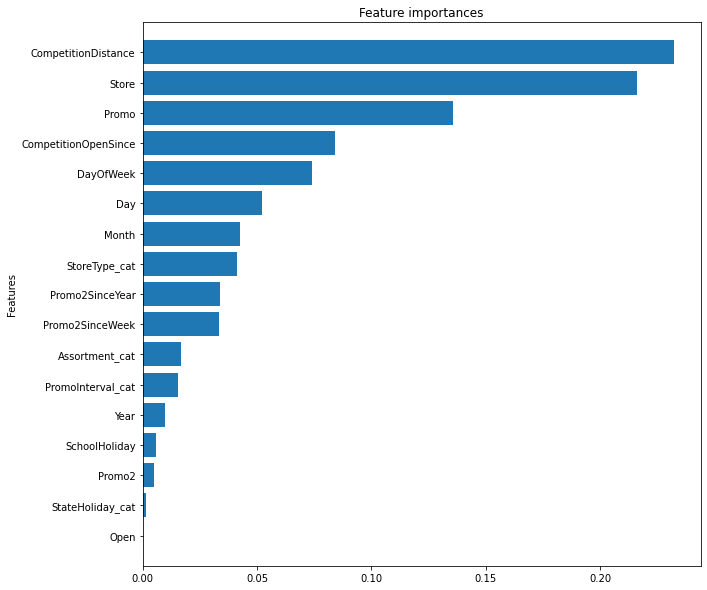

In [124]:
importances = rfr.feature_importances_
std = np.std([rfr.feature_importances_ for tree in rfr.estimators_],
             axis=0)
indices = np.argsort(importances)
palette1 = itertools.cycle(sns.color_palette())
# Store the feature ranking
features_ranked=[]
for f in range(X_train.shape[1]):
    features_ranked.append(X_train.columns[indices[f]])
# Plot the feature importances of the forest

plt.figure(figsize=(10,10))
plt.title("Feature importances")
plt.barh(range(X_train.shape[1]), importances[indices],
            color=[next(palette1)], align="center")
plt.yticks(range(X_train.shape[1]), features_ranked)
plt.ylabel('Features')
plt.ylim([-1, X_train.shape[1]])
plt.show()

### XGBoost

In [125]:
import xgboost as xgb

In [126]:
def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat/y-1) ** 2))

def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y,yhat)

In [127]:
param = {"max_depth" : 10, "booster":"gbtree","eta":1,"silent":1,
        "objective":"reg:linear", "seed":10}

num_round = 100

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_train_test, y_train_test)
watchlist = [(dtrain,"train"), (dtest,"eval")]

xgboost = xgb.train(param, dtrain, num_round, evals=watchlist, early_stopping_rounds = 100, 
                    feval = rmspe_xg, verbose_eval = True)

# Make Prediction

preds = xgboost.predict(dtest)

[09:00:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[09:00:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:2273.21875	train-rmspe:nan	eval-rmse:2296.66260	eval-rmspe:nan


<ipython-input-126-4897c67880b8>:5: RuntimeWarning: overflow encountered in expm1
  y = np.expm1(y.get_label())
<ipython-input-126-4897c67880b8>:6: RuntimeWarning: overflow encountered in expm1
  yhat = np.expm1(yhat)
<ipython-input-126-4897c67880b8>:2: RuntimeWarning: invalid value encountered in true_divide
  return np.sqrt(np.mean((yhat/y-1) ** 2))


[1]	train-rmse:2147.27686	train-rmspe:nan	eval-rmse:2182.02466	eval-rmspe:nan
[2]	train-rmse:2061.17700	train-rmspe:nan	eval-rmse:2099.47534	eval-rmspe:nan
[3]	train-rmse:1782.32922	train-rmspe:nan	eval-rmse:1816.40308	eval-rmspe:nan
[4]	train-rmse:1690.34326	train-rmspe:nan	eval-rmse:1728.00598	eval-rmspe:nan
[5]	train-rmse:1500.65723	train-rmspe:nan	eval-rmse:1540.32312	eval-rmspe:nan
[6]	train-rmse:1403.90283	train-rmspe:nan	eval-rmse:1444.82056	eval-rmspe:nan
[7]	train-rmse:1270.65613	train-rmspe:nan	eval-rmse:1314.96863	eval-rmspe:nan
[8]	train-rmse:1247.36646	train-rmspe:nan	eval-rmse:1294.26514	eval-rmspe:nan
[9]	train-rmse:1196.40466	train-rmspe:nan	eval-rmse:1249.79736	eval-rmspe:nan
[10]	train-rmse:1155.85144	train-rmspe:nan	eval-rmse:1217.17175	eval-rmspe:nan
[11]	train-rmse:1112.62610	train-rmspe:nan	eval-rmse:1176.11670	eval-rmspe:nan
[12]	train-rmse:1095.05981	train-rmspe:nan	eval-rmse:1161.38696	eval-rmspe:nan
[13]	train-rmse:1064.75378	train-rmspe:nan	eval-rmse:1131.490

<ipython-input-126-4897c67880b8>:2: RuntimeWarning: divide by zero encountered in true_divide
  return np.sqrt(np.mean((yhat/y-1) ** 2))


[71]	train-rmse:669.53802	train-rmspe:nan	eval-rmse:894.12598	eval-rmspe:nan
[72]	train-rmse:666.57983	train-rmspe:nan	eval-rmse:893.51697	eval-rmspe:nan
[73]	train-rmse:664.27570	train-rmspe:nan	eval-rmse:893.23718	eval-rmspe:nan
[74]	train-rmse:661.75793	train-rmspe:nan	eval-rmse:892.12860	eval-rmspe:nan
[75]	train-rmse:659.06836	train-rmspe:nan	eval-rmse:891.66272	eval-rmspe:nan
[76]	train-rmse:655.84088	train-rmspe:nan	eval-rmse:889.98016	eval-rmspe:nan
[77]	train-rmse:653.31665	train-rmspe:nan	eval-rmse:889.19165	eval-rmspe:nan
[78]	train-rmse:650.91675	train-rmspe:nan	eval-rmse:888.42401	eval-rmspe:nan
[79]	train-rmse:647.90887	train-rmspe:nan	eval-rmse:888.33508	eval-rmspe:nan
[80]	train-rmse:646.51434	train-rmspe:nan	eval-rmse:888.13123	eval-rmspe:nan
[81]	train-rmse:643.52698	train-rmspe:nan	eval-rmse:887.64691	eval-rmspe:nan
[82]	train-rmse:641.38251	train-rmspe:nan	eval-rmse:887.60382	eval-rmspe:nan
[83]	train-rmse:639.52747	train-rmspe:nan	eval-rmse:887.35199	eval-rmspe:nan

In [128]:
rms_xgboost = sqrt(mean_squared_error(y_train_test, preds))
print("RMS:", rms_xgboost) 

RMS: 879.5286492711358


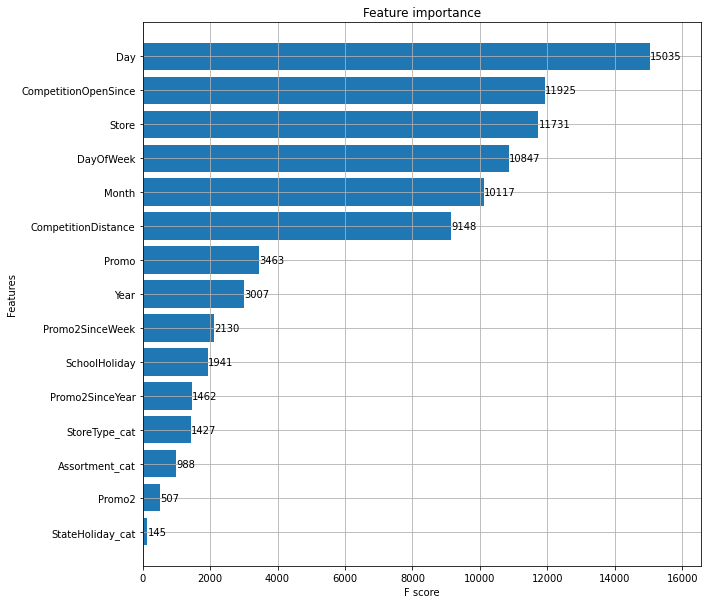

In [129]:
# Lets see the feature importance
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(xgboost, max_num_features=50, height=0.8, ax=ax)
plt.show()